<a href="https://colab.research.google.com/github/harshavardhangadila/Basic-Neural-Network-Using-Numpy-Keras-Pytorch-and-Jax/blob/main/4)_PyTorch_with_nn_Module.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PyTorch Class-Based Neural Network with nn.Module

In [1]:
# 1. Imports
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# 2. Generate 3-Variable Nonlinear Synthetic Data
def generate_data(n_samples=1000):
    x1 = np.random.uniform(-5, 5, n_samples)
    x2 = np.random.uniform(-5, 5, n_samples)
    x3 = np.random.uniform(-5, 5, n_samples)
    y = 2 * np.sin(x1) + 0.5 * x2**2 + 0.3 * x3**3 + np.cos(x1 * x2)
    y += np.random.normal(0, 0.2, n_samples)  # Add noise
    X = np.column_stack([x1, x2, x3]).astype(np.float32)
    y = y.astype(np.float32).reshape(-1, 1)
    return torch.tensor(X), torch.tensor(y)

X_train, y_train = generate_data()


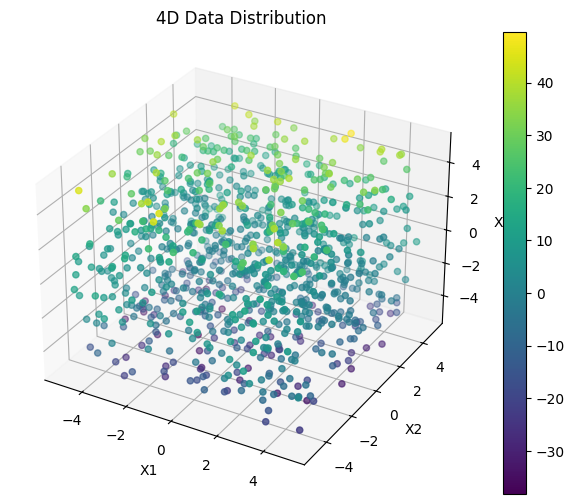

In [3]:
# 3. Visualize 4D Data (input = X1, X2, X3; color = y)
def plot_4d(X, y):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    sc = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y.squeeze(), cmap='viridis')
    plt.colorbar(sc)
    ax.set_xlabel("X1")
    ax.set_ylabel("X2")
    ax.set_zlabel("X3")
    ax.set_title("4D Data Distribution")
    plt.show()

plot_4d(X_train, y_train)

In [4]:
# 4. Define Neural Network Model using nn.Module
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(3, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)

In [5]:
# 5. Initialize Model, Loss, Optimizer
model = NeuralNet()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)


In [6]:
# 6. Training Loop
epochs = 1000
losses = []

for epoch in range(epochs):
    model.train()
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0 or epoch < 5:
        print(f"Epoch {epoch:4d} | Loss: {loss.item():.5f}")


Epoch    0 | Loss: 244.52414
Epoch    1 | Loss: 234.59628
Epoch    2 | Loss: 225.57028
Epoch    3 | Loss: 215.34225
Epoch    4 | Loss: 203.34775
Epoch  100 | Loss: 6.15138
Epoch  200 | Loss: 0.99800
Epoch  300 | Loss: 0.63025
Epoch  400 | Loss: 0.62115
Epoch  500 | Loss: 0.52105
Epoch  600 | Loss: 0.47404
Epoch  700 | Loss: 0.44731
Epoch  800 | Loss: 0.42934
Epoch  900 | Loss: 0.41625


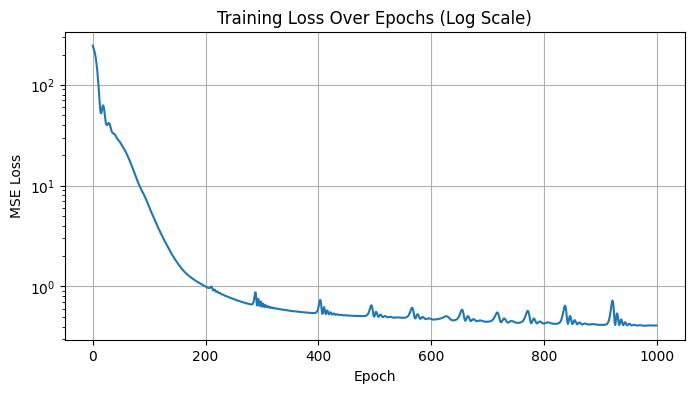

In [7]:
# 7. Plot Loss
plt.figure(figsize=(8, 4))
plt.semilogy(losses)
plt.title("Training Loss Over Epochs (Log Scale)")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.show()

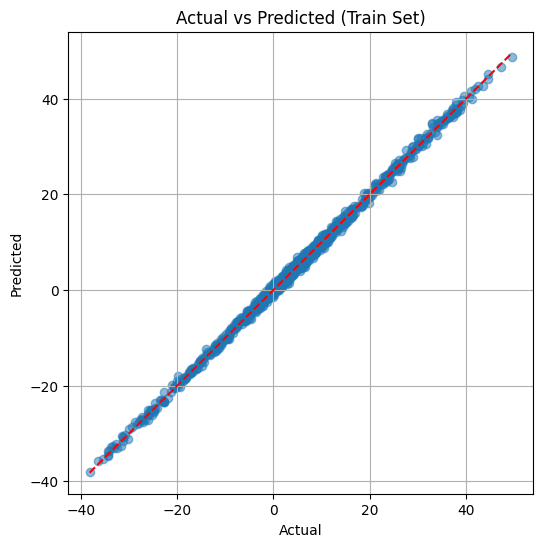

In [8]:
# 8. Actual vs Predicted
model.eval()
with torch.no_grad():
    y_pred = model(X_train)

plt.figure(figsize=(6, 6))
plt.scatter(y_train.numpy(), y_pred.numpy(), alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted (Train Set)")
plt.grid(True)
plt.show()

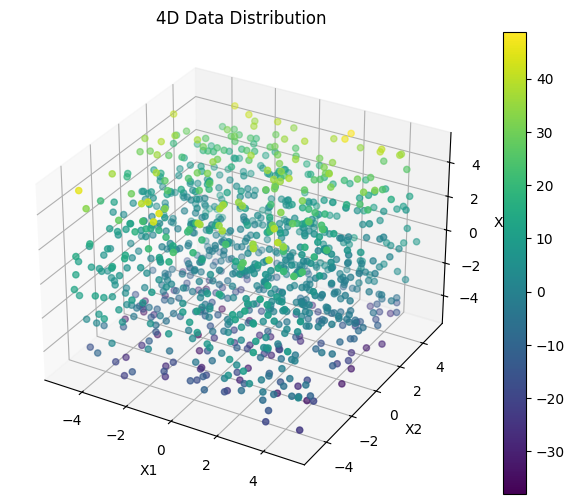

In [9]:
# 9. 4D Prediction Visualization
plot_4d(X_train, y_pred)


In [10]:
# 10. Predict on Custom Points
def predict_custom(x1, x2, x3):
    model.eval()
    with torch.no_grad():
        input_tensor = torch.FloatTensor([[x1, x2, x3]])
        prediction = model(input_tensor)
        return prediction.item()


In [11]:
test_pts = [(-4, -4, -4), (-2, -2, -2), (0, 0, 0), (2, 2, 2), (4, 4, 4)]
print("\nTest Predictions:")
for x1, x2, x3 in test_pts:
    pred = predict_custom(x1, x2, x3)
    actual = 2 * np.sin(x1) + 0.5 * x2**2 + 0.3 * x3**3 + np.cos(x1 * x2)
    print(f"Input: ({x1}, {x2}, {x3}) → Prediction: {pred:.3f}, Actual: {actual:.3f}")


Test Predictions:
Input: (-4, -4, -4) → Prediction: -9.142, Actual: -10.644
Input: (-2, -2, -2) → Prediction: -2.495, Actual: -2.872
Input: (0, 0, 0) → Prediction: 0.850, Actual: 1.000
Input: (2, 2, 2) → Prediction: 5.246, Actual: 5.565
Input: (4, 4, 4) → Prediction: 26.691, Actual: 24.729
